# Data Preprocessing

In [15]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
import numpy as np
import pandas as pd
import warnings
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.exceptions import ConvergenceWarning  # Importing ConvergenceWarning

# Data Import

In [16]:
Career_Stats_df = pd.read_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/CSV_files/Player Stats/Career_Stats_PC.csv', delimiter=',')

# Preprocessing

In [17]:
Career_Stats_df.head()

,player_name,career_kills,career_wins,career_revives
0,凪茄,384461,0,17523
1,MaddBrooo,379276,21007,28765
2,AmaneeMisa,357870,0,0
3,xoKaiz YT,344453,12049,16916
4,Upthrow,286883,19839,61443


In [18]:
Career_Stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player_name     978 non-null    object
 1   career_kills    979 non-null    int64 
 2   career_wins     979 non-null    int64 
 3   career_revives  979 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 30.7+ KB


# Converting Objects into Numerical Values

In [19]:
# Convert the relevant columns to numeric
Career_Stats_df['career_kills'] = pd.to_numeric(Career_Stats_df['career_kills'], errors='coerce')
Career_Stats_df['career_wins'] = pd.to_numeric(Career_Stats_df['career_wins'], errors='coerce')
Career_Stats_df['career_revives'] = pd.to_numeric(Career_Stats_df['career_revives'], errors='coerce')
#Randomize data
Career_Stats_df = Career_Stats_df.sample(frac=1).reset_index(drop=True)
# Print the data types to verify the changes
Career_Stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player_name     978 non-null    object
 1   career_kills    979 non-null    int64 
 2   career_wins     979 non-null    int64 
 3   career_revives  979 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 30.7+ KB


In [20]:
# df_report = ProfileReport(Career_Stats_df, minimal=True)
# df_report.to_file(output_file='Career_Stats.html')

# Drop Unnecessary Columns

In [21]:
# Replace 0s with NaN to treat them as missing values
Career_Stats_df.replace(0, np.nan, inplace=True)

# Drop the player_name column
player_names = Career_Stats_df['player_name']
numeric_df = Career_Stats_df.drop(columns=['player_name'])

# Data Imputation(filling in missing values using different techniques)

In [22]:
# Suppress iteration warnings for logistic regression convergence
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

print("Starting imputation processes...")

# Mode Imputation
print("Performing Mode Imputation...")
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_mode_imputed.insert(0, 'player_name', player_names)
print("Mode Imputation completed.")

# Logistic Regression Imputation
print("Performing Logistic Regression Imputation...")
lr_imputer = IterativeImputer(estimator=LogisticRegression(solver='lbfgs'), random_state=42, max_iter=10, verbose=2)
df_lr_imputed = pd.DataFrame(lr_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_lr_imputed.insert(0, 'player_name', player_names)
print("Logistic Regression Imputation completed.")

# Random Forest Imputation
print("Performing Random Forest Imputation...")
rf_imputer = IterativeImputer(estimator=RandomForestClassifier(n_estimators=10), random_state=42, max_iter=10, verbose=2)
df_rf_imputed = pd.DataFrame(rf_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_rf_imputed.insert(0, 'player_name', player_names)
print("Random Forest Imputation completed.")

# KNN Imputation
print("Performing KNN Imputation...")
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_knn_imputed.insert(0, 'player_name', player_names)
print("KNN Imputation completed.")

# Mean Imputation
print("Performing Mean Imputation...")
mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_mean_imputed.insert(0, 'player_name', player_names)
print("Mean Imputation completed.")

# Median Imputation
print("Performing Median Imputation...")
median_imputer = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(median_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_median_imputed.insert(0, 'player_name', player_names)
print("Median Imputation completed.")

# XGBoost Imputation
print("Performing XGBoost Imputation...")
xgb_imputer = IterativeImputer(estimator=XGBRegressor(), random_state=42, max_iter=10, verbose=2)
df_xgb_imputed = pd.DataFrame(xgb_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_xgb_imputed.insert(0, 'player_name', player_names)
print("XGBoost Imputation completed.")

# MICE Imputation
print("Performing MICE Imputation...")
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_mice_imputed.insert(0, 'player_name', player_names)
print("MICE Imputation completed.")

# Dictionary of imputed dataframes
imputed_dataframes = {
    "Mode Imputation": df_mode_imputed,
    "Logistic Regression Imputation": df_lr_imputed,
    "Random Forest Imputation": df_rf_imputed,
    "KNN Imputation": df_knn_imputed,
    "Mean Imputation": df_mean_imputed,
    "Median Imputation": df_median_imputed,
    "XGBoost Imputation": df_xgb_imputed,
    "MICE Imputation": df_mice_imputed
}

# Check that there are no missing values
print("\nVerifying no missing values after imputation:")
for name, df in imputed_dataframes.items():
    missing = df.isnull().sum().sum()
    print(f"{name}: {missing} missing values")

print("\nOriginal dataframe missing values (should be unchanged):")
print(Career_Stats_df.isnull().sum())


# Save Logistic Regression imputed data
df_lr_imputed.to_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_lr_imputed_PC.csv', index=False)

# Save Random Forest imputed data
df_rf_imputed.to_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_rf_imputed_PC.csv', index=False)

# Save KNN imputed data
df_knn_imputed.to_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_knn_imputed_PC.csv', index=False)

# Save Mean imputed data
df_mean_imputed.to_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_mean_imputed_PC.csv', index=False)

# Save Median imputed data
df_median_imputed.to_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_median_imputed_PC.csv', index=False)

# Save XGBoost imputed data
df_xgb_imputed.to_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_xgb_imputed_PC.csv', index=False)

# Save MICE imputed data
df_mice_imputed.to_csv('C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_mice_imputed_PC.csv', index=False)


Starting imputation processes...
Performing Mode Imputation...
Mode Imputation completed.
Performing Logistic Regression Imputation...
[IterativeImputer] Completing matrix with shape (979, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 3.90
[IterativeImputer] Change: 49540.79176187811, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 2/10, elapsed time 7.16
[IterativeImputer] Change: 49671.0, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 3/10, elapsed time 10.40
[IterativeImputer] Change: 58941.0, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 4/10, elapsed time 13.38
[IterativeImputer] Change: 61357.0, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 5/10, elapsed time 16.26
[IterativeImputer] Change: 52524.0, scaled tolerance: 384.461 
[IterativeImputer] Ending imputation round 6/10, elapsed time 18.82
[IterativeImputer] Change: 58122.0, scaled tolerance: 384.461 
[IterativeImpu

# Training the model on each imputed dataset to see which dataset is the best and running for each stat as the target variable

In [23]:

# Define the regression models to be used
models = {
    "Random Forest": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "LightGBM Regressor": lgb.LGBMRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Function to run model prediction
def run_model_prediction(target_column, df):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
    return model_scores

# Target columns to predict
target_columns = ['career_kills', 'career_wins', 'career_revives']

# Dictionary to store results for each imputation method and each target column
all_results = {}

# Running models on each imputed dataset for each target column
for imputation_method, imputed_df in imputed_dataframes.items():
    print(f"\nRunning models on {imputation_method} data:")
    # Drop the player_name column
    imputed_df = imputed_df.drop(columns=['player_name'])
    
    imputation_results = {}
    for target_column in target_columns:
        print(f"  Predicting {target_column}...")
        model_scores = run_model_prediction(target_column, imputed_df)
        imputation_results[target_column] = model_scores
    all_results[imputation_method] = imputation_results

# Results
for imputation_method, imputation_results in all_results.items():
    print(f"\nResults for {imputation_method}:")
    for target_column, model_scores in imputation_results.items():
        print(f"  Target: {target_column}")
        for model_name, score in model_scores.items():
            print(f"    {model_name}: {score:.4f}")

# Find the best model and imputation method for each target
best_combinations = {}
for target_column in target_columns:
    best_score = float('-inf')  # Initialize to the lowest possible score
    best_model = ""
    best_imputation = ""
    for imputation_method, imputation_results in all_results.items():
        for model_name, score in imputation_results[target_column].items():
            if score > best_score:
                best_score = score
                best_model = model_name
                best_imputation = imputation_method
    best_combinations[target_column] = (best_imputation, best_model, best_score)

print("\nBest Combinations:")
for target, (imputation, model, score) in best_combinations.items():
    print(f"{target}: {imputation} with {model} (Score: {score:.4f})")



Running models on Mode Imputation data:
  Predicting career_kills...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 783, number of used features: 2
[LightGBM] [Info] Start training from score 107518.028097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [24]:
print("Career Kills Distribution:")
print(Career_Stats_df['career_kills'].describe())
print("\nCareer Wins Distribution:")
print(Career_Stats_df['career_wins'].describe())
print("\nCareer Revives Distribution:")
print(Career_Stats_df['career_revives'].describe())


Career Kills Distribution:
count       979.000000
mean     107596.732380
std       34876.204968
min        1035.000000
25%       86615.500000
50%       96969.000000
75%      114684.000000
max      384461.000000
Name: career_kills, dtype: float64

Career Wins Distribution:
count      605.000000
mean      6575.170248
std       2700.693749
min       1947.000000
25%       4772.000000
50%       5967.000000
75%       7672.000000
max      23953.000000
Name: career_wins, dtype: float64

Career Revives Distribution:
count      502.000000
mean     12765.378486
std       5034.214861
min       3753.000000
25%       9812.500000
50%      11556.000000
75%      13911.750000
max      61443.000000
Name: career_revives, dtype: float64


## Cross-Validation and Additional Metrics

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split

# Define the target variable and features
target_variable = 'career_kills'
features = [col for col in df_mode_imputed.columns if col != 'player_name' and col != target_variable]

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate each imputed dataset
for name, df in imputed_dataframes.items():
    X = df[features]
    y = df[target_variable]
    
    # Use a simple model like RandomForest for evaluation
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Cross-validation
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    
    # Store evaluation metrics
    evaluation_results[name] = {
        'Mean MSE': -np.mean(mse_scores),
        'Mean R2': np.mean(r2_scores),
        'Mean MAE': -np.mean(mae_scores)
    }

# Display evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print("Evaluation Results for Different Imputation Methods:")
print(evaluation_df)

Evaluation Results for Different Imputation Methods:
                                    Mean MSE   Mean R2      Mean MAE
Mode Imputation                 9.105730e+08  0.240880  19223.490142
Logistic Regression Imputation  5.612808e+08  0.554087  12848.839237
Random Forest Imputation        3.039444e+08  0.752182   9113.109712
KNN Imputation                  5.065239e+08  0.583203  13379.035136
Mean Imputation                 9.120927e+08  0.225136  19159.374139
Median Imputation               9.094541e+08  0.232254  19172.259080
XGBoost Imputation              4.351149e+08  0.636085  12204.071319
MICE Imputation                 4.617850e+08  0.621770  11361.110433


## Data Distribution and Consistency Checks

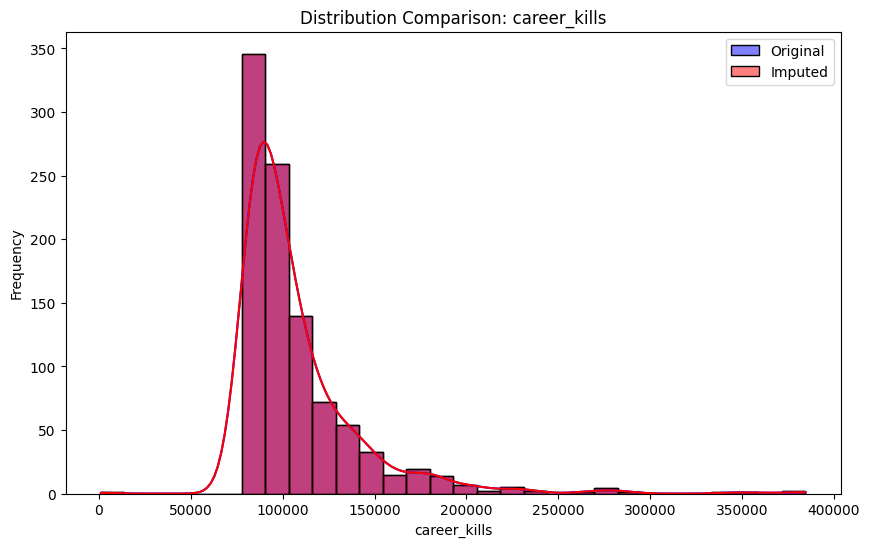

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of original vs. imputed data
def plot_distribution_comparison(original_data, imputed_data, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(original_data[feature].dropna(), color='blue', kde=True, label='Original', bins=30)
    sns.histplot(imputed_data[feature], color='red', kde=True, label='Imputed', bins=30)
    plt.title(f"Distribution Comparison: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Assuming `Career_Stats_df` contains the original dataset with missing values
original_data = Career_Stats_df

# Compare distributions for a sample feature
feature_to_compare = 'career_kills'
plot_distribution_comparison(original_data, df_mice_imputed, feature_to_compare)


## Ensemble of Imputation Methods

In [27]:
from sklearn.ensemble import VotingRegressor

# Prepare datasets for ensemble
datasets_for_ensemble = [df_lr_imputed, df_rf_imputed, df_knn_imputed]

# Training data for ensemble model
X_ensemble = pd.concat([df[features] for df in datasets_for_ensemble])
y_ensemble = pd.concat([df[target_variable] for df in datasets_for_ensemble])

# Create a voting regressor ensemble model
ensemble_model = VotingRegressor([
    ('lr', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('knn', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Cross-validation for ensemble model
mse_scores_ensemble = cross_val_score(ensemble_model, X_ensemble, y_ensemble, cv=5, scoring='neg_mean_squared_error')
r2_scores_ensemble = cross_val_score(ensemble_model, X_ensemble, y_ensemble, cv=5, scoring='r2')

print("Ensemble Model Evaluation:")
print(f"Mean MSE: {-np.mean(mse_scores_ensemble)}")
print(f"Mean R2: {np.mean(r2_scores_ensemble)}")


Ensemble Model Evaluation:
Mean MSE: 191369606.636336
Mean R2: 0.8433502425587897


In [28]:
ensemble_df = pd.concat(datasets_for_ensemble)
# Assuming 'player_name' is a unique identifier, remove duplicates by averaging or taking the first occurrence
ensemble_df = ensemble_df.groupby('player_name', as_index=False).mean()

# Define the output file path
output_csv = 'C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_ensemble_imputed_PC.csv'

# Write the ensemble-imputed dataset to a CSV file
ensemble_df.to_csv(output_csv, index=False)

print(f"Ensemble imputed dataset saved to {output_csv}")

Ensemble imputed dataset saved to C:/Users/altaa/Documents/GitHub/Apex-Legends-Research/Data_Retrieval/py_files/Notebook_For_Data_Preprocessing/Data Imputation Files PC/Career_Stats_ensemble_imputed_PC.csv


## Distribution Comparison:

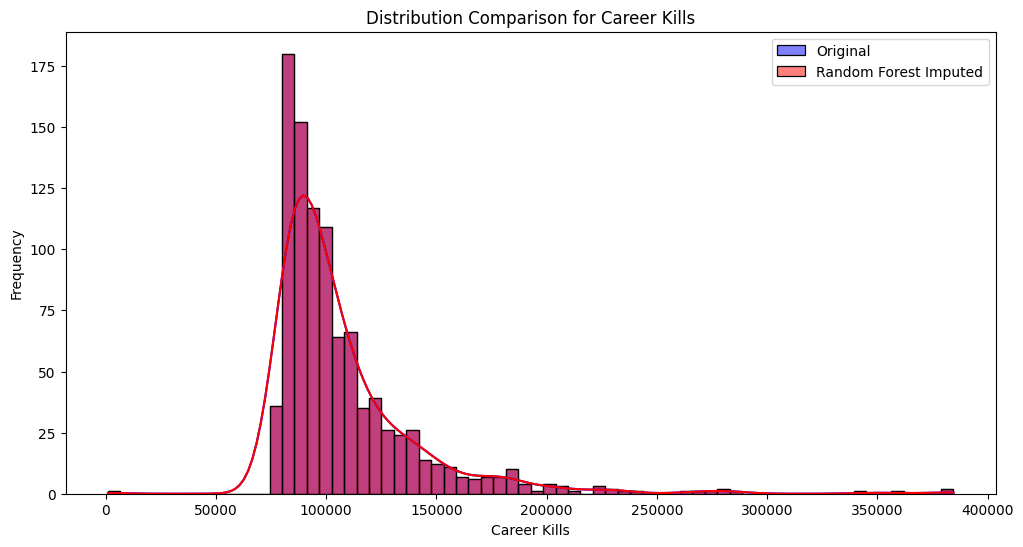

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare distributions for a feature (e.g., career_kills)
plt.figure(figsize=(12, 6))
sns.histplot(Career_Stats_df['career_kills'].dropna(), color='blue', label='Original', kde=True)
sns.histplot(df_mice_imputed['career_kills'], color='red', label='Random Forest Imputed', kde=True)
plt.title('Distribution Comparison for Career Kills')
plt.xlabel('Career Kills')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Correlation Analysis

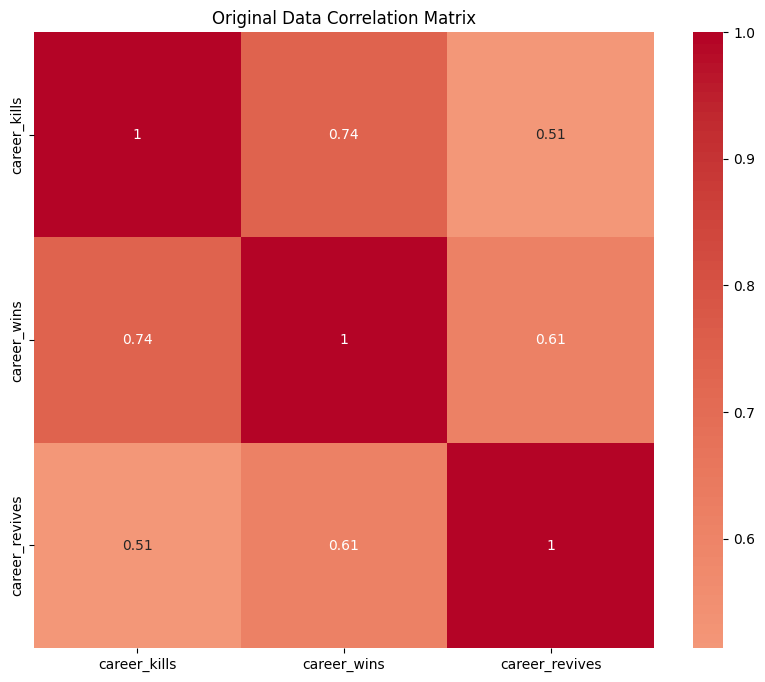

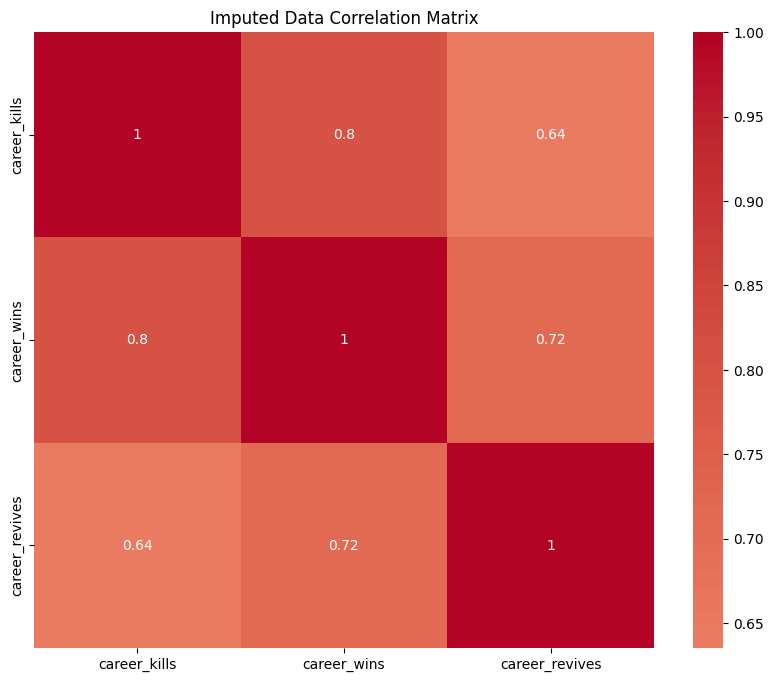

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the player_name column and keep only numeric data for correlation
numeric_original = Career_Stats_df.drop(columns=['player_name']).select_dtypes(include=['number'])
numeric_imputed = df_mice_imputed.drop(columns=['player_name']).select_dtypes(include=['number'])

# Calculate correlation matrices
original_corr = numeric_original.corr()
imputed_corr = numeric_imputed.corr()

# Visualize the correlation matrices
plt.figure(figsize=(10, 8))
sns.heatmap(original_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Original Data Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(imputed_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Imputed Data Correlation Matrix')
plt.show()
